In [4]:
!pip install scikit-learn-extra

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
#reading data from an cvs file
data = pd.read_csv("income.csv")
print(data.head())


      Name  Age  Income
0      Rob   27   70000
1  Michael   29   90000
2    Mohan   29   61000
3   Ismail   28   60000
4     Kory   42  150000


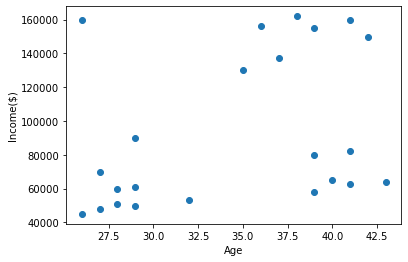

In [8]:

# Show data on a plot
plt.scatter(data['Age'],data['Income'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()



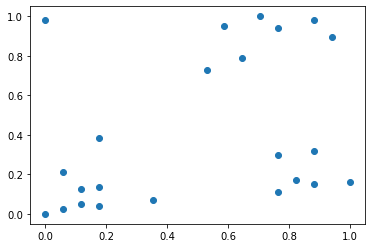

In [11]:

#Preprocessing data
scaler = MinMaxScaler()

scaler.fit(data[['Income']])
data['Income'] = scaler.transform(data[['Income']])

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])
plt.scatter(data.Age,data['Income'])
plt.show()


      Name       Age    Income  cluster
0      Rob  0.058824  0.213675        2
1  Michael  0.176471  0.384615        1
2    Mohan  0.176471  0.136752        2
3   Ismail  0.117647  0.128205        2
4     Kory  0.941176  0.897436        0


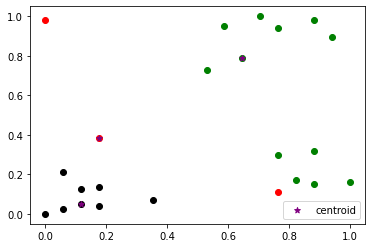

In [13]:


kMedoids = KMedoids(n_clusters = 3, random_state = 0)
y_kmed = kMedoids.fit_predict(data[['Age','Income']])
data['cluster']=y_kmed
print(data.head())
#print(y_kmed)

#collect the data of each cluster
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

#plot the data
plt.scatter(data1.Age,data1['Income'],color='green')
plt.scatter(data2.Age,data2['Income'],color='red')
plt.scatter(data3.Age,data3['Income'],color='black')
plt.scatter(kMedoids.cluster_centers_[:,0],kMedoids.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.show()